In [77]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("../data/data.csv", sep=",")

X = df.loc[:, df.columns != "is_alarm"]
y = df["is_alarm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()

param_grid = {
    "penalty": ["l1", "l2"], 
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "max_iter": [500, 750, 1000]
}
search = GridSearchCV(model, param_grid=param_grid, scoring="accuracy", n_jobs=-1, cv=5)
search.fit(X_train, y_train)
best_params = search.best_params_
model_tuned = LogisticRegression(**best_params)
model_tuned.fit(X_train, y_train)

with open("logistic-regression.pickle", "wb") as handle:
    pickle.dump(model_tuned, handle, protocol=pickle.HIGHEST_PROTOCOL)

y_pred = model_tuned.predict(X)

accuracy = accuracy_score(y, y_pred)

print(f"Accuracy: {accuracy:.2%} ({accuracy})", end="\n\n")

feature_weights = model_tuned.coef_
feature_weights_mapping = pd.DataFrame(
    {
        "feature": [i for i in list(df.columns) if i != "is_alarm"],
        "weight": feature_weights[0],
    }
)
feature_weights_mapping = feature_weights_mapping.sort_values(
    by=["weight"], ascending=False
).head(20)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("Top 20 features:")
print(feature_weights_mapping)


Accuracy: 88.16% (0.8816458571670982)

Top 20 features:
                feature    weight
109  global_alarm_count  0.278957
110     events_last_24h  0.191824
4           hour_precip  0.046564
7       hour_cloudcover  0.001324
108           dvornikov  0.000415
55                lapin  0.000241
15                  men  0.000214
48                 mdco  0.000209
14                   ir  0.000192
24              nuclear  0.000176
83                 spac  0.000149
16                  lym  0.000134
17               shoigu  0.000096
82                soled  0.000075
39                 crit  0.000075
11               svatov  0.000067
86             kupyansk  0.000046
31                 dron  0.000005
45               vuhled -0.000003
84                 foot -0.000004


/Users/mhalaida/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


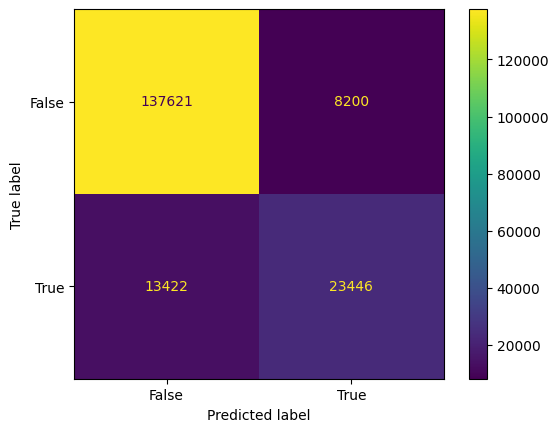

In [78]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_tuned.classes_)
disp.plot()
plt.show()